## Imports and installations

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install top2vec==1.0.16
!pip install tensorflow tensorflow_hub tensorflow_text
!pip install 'top2vec[sentence_encoders]'
!pip install 'top2vec[sentence_transformers]'
!pip install 'top2vec[indexing]'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from top2vec import Top2Vec

# Read data

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/large_df')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.sort_values(by=['Datetime'],inplace=True)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Unnamed: 4,preprocessed
1056652,1786720,‚ÄúA lovely,warm,kind,sensitive,generous soul with a touch of naughty! RIP.‚Äù,sensitive
1111874,1914382,The 'homeless hero',who was donated over ¬£52,000 for helping Manchester Arena terror victims,admits he stole from the wounded,NaN,admits stole wounded
13277,13793,13774,2008-07-28 07:20:28+00:00,870335870.0,The end of the pier show: Weston-Super-Mare lo...,NaN,end pier show weston super mare loses attracti...
13276,13792,13773,2008-07-28 07:50:03+00:00,870349691.0,The end of the pier show: Weston-super-Mare lo...,NaN,end pier show weston super mare loses attracti...
13275,13791,13772,2008-07-28 07:50:05+00:00,870349721.0,Neighbours from hell: The £65m &#039;Bitch fro...,NaN,neighbours hell £65m 039 bitch budapest 039 un...


In [ ]:
df.tail(5)

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Unnamed: 4,preprocessed
180419,270139,3,2022-06-09 23:45:09+00:00,1535045367053549568.0,Friends of ex-Qatari royal dead of OD say 'no ...,NaN,friends ex qatari royal dead od say way used d...
180418,270138,2,2022-06-09 23:49:21+00:00,1535046424026660864.0,EXCLUSIVE: Britney Spears' big brother seen ru...,NaN,exclusive britney spears big brother seen runn...
180417,270137,1,2022-06-09 23:50:00+00:00,1535046584559357952.0,"Ooh, today's Wordle puzzle is a tricky one, wh...",NaN,ooh today wordle puzzle tricky one put togethe...
180416,270136,0,2022-06-09 23:56:58+00:00,1535048339720380416.0,Molly-Mae Hague's dad discusses her 'unfair an...,NaN,molly mae hague dad discusses unfair prominent...
6976,7038,.. http://tinyurl.com/cns7o7,NaN,NaN,NaN,NaN,none


In [ ]:
df.reset_index()


,index,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Unnamed: 4,preprocessed
0,1056652,1786720,‚ÄúA lovely,warm,kind,sensitive,generous soul with a touch of naughty! RIP.‚Äù,sensitive
1,1111874,1914382,The 'homeless hero',who was donated over ¬£52,000 for helping Manchester Arena terror victims,admits he stole from the wounded,NaN,admits stole wounded
2,13277,13793,13774,2008-07-28 07:20:28+00:00,870335870.0,The end of the pier show: Weston-Super-Mare lo...,NaN,end pier show weston super mare loses attracti...
3,13276,13792,13773,2008-07-28 07:50:03+00:00,870349691.0,The end of the pier show: Weston-super-Mare lo...,NaN,end pier show weston super mare loses attracti...
4,13275,13791,13772,2008-07-28 07:50:05+00:00,870349721.0,Neighbours from hell: The £65m &#039;Bitch fro...,NaN,neighbours hell £65m 039 bitch budapest 039 un...
...,...,...,...,...,...,...,...,...
1183411,180419,270139,3,2022-06-09 23:45:09+00:00,1535045367053549568.0,Friends of ex-Qatari royal dead of OD say 'no ...,NaN,friends ex qatari royal dead od say way used d...
1183412,180418,270138,2,2022-06-09 23:49:21+00:00,1535046424026660864.0,EXCLUSIVE: Britney Spears' big brother seen ru...,NaN,exclusive britney spears big brother seen runn...
1183413,180417,270137,1,2022-06-09 23:50:00+00:00,1535046584559357952.0,"Ooh, today's Wordle puzzle is a tricky one, wh...",NaN,ooh today wordle puzzle tricky one put togethe...
1183414,180416,270136,0,2022-06-09 23:56:58+00:00,1535048339720380416.0,Molly-Mae Hague's dad discusses her 'unfair an...,NaN,molly mae hague dad discusses unfair prominent...



# April 2020 - present
```

```



In [ ]:
# index df from Arpil 2020 to present
list_tweets_2 = [str(i) for i in df['preprocessed'][816555:]]
print(len(df),len(list_tweets_2))

1183414 366859


In [ ]:
df.iloc[816555]

Unnamed: 0                                                 657738
Unnamed: 0.1                                                78874
Datetime                                2020-04-21 13:12:41+00:00
Tweet Id                                    1252586051027324928.0
Text            Celebrate like a Queen! The Monarch's birthday...
Unnamed: 4                                                    NaN
preprocessed    celebrate like queen monarch birthday itinerar...
Name: 391917, dtype: object

In [ ]:
%%time 
model_5 = Top2Vec(list_tweets_2, workers=-2, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-12 09:41:28,958 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-12 09:41:44,338 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-12 09:41:47,946 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-12 09:42:06,415 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-12 09:48:43,069 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-12 09:49:07,724 - top2v

CPU times: user 24min 27s, sys: 1min 51s, total: 26min 18s
Wall time: 7min 48s


In [ ]:
# The number of topics Top2Vec has found
model_5.get_num_topics()

1691

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["migrant"], num_topics=5)
topic_nums

array([  31,  215,  707,  652, 1115])

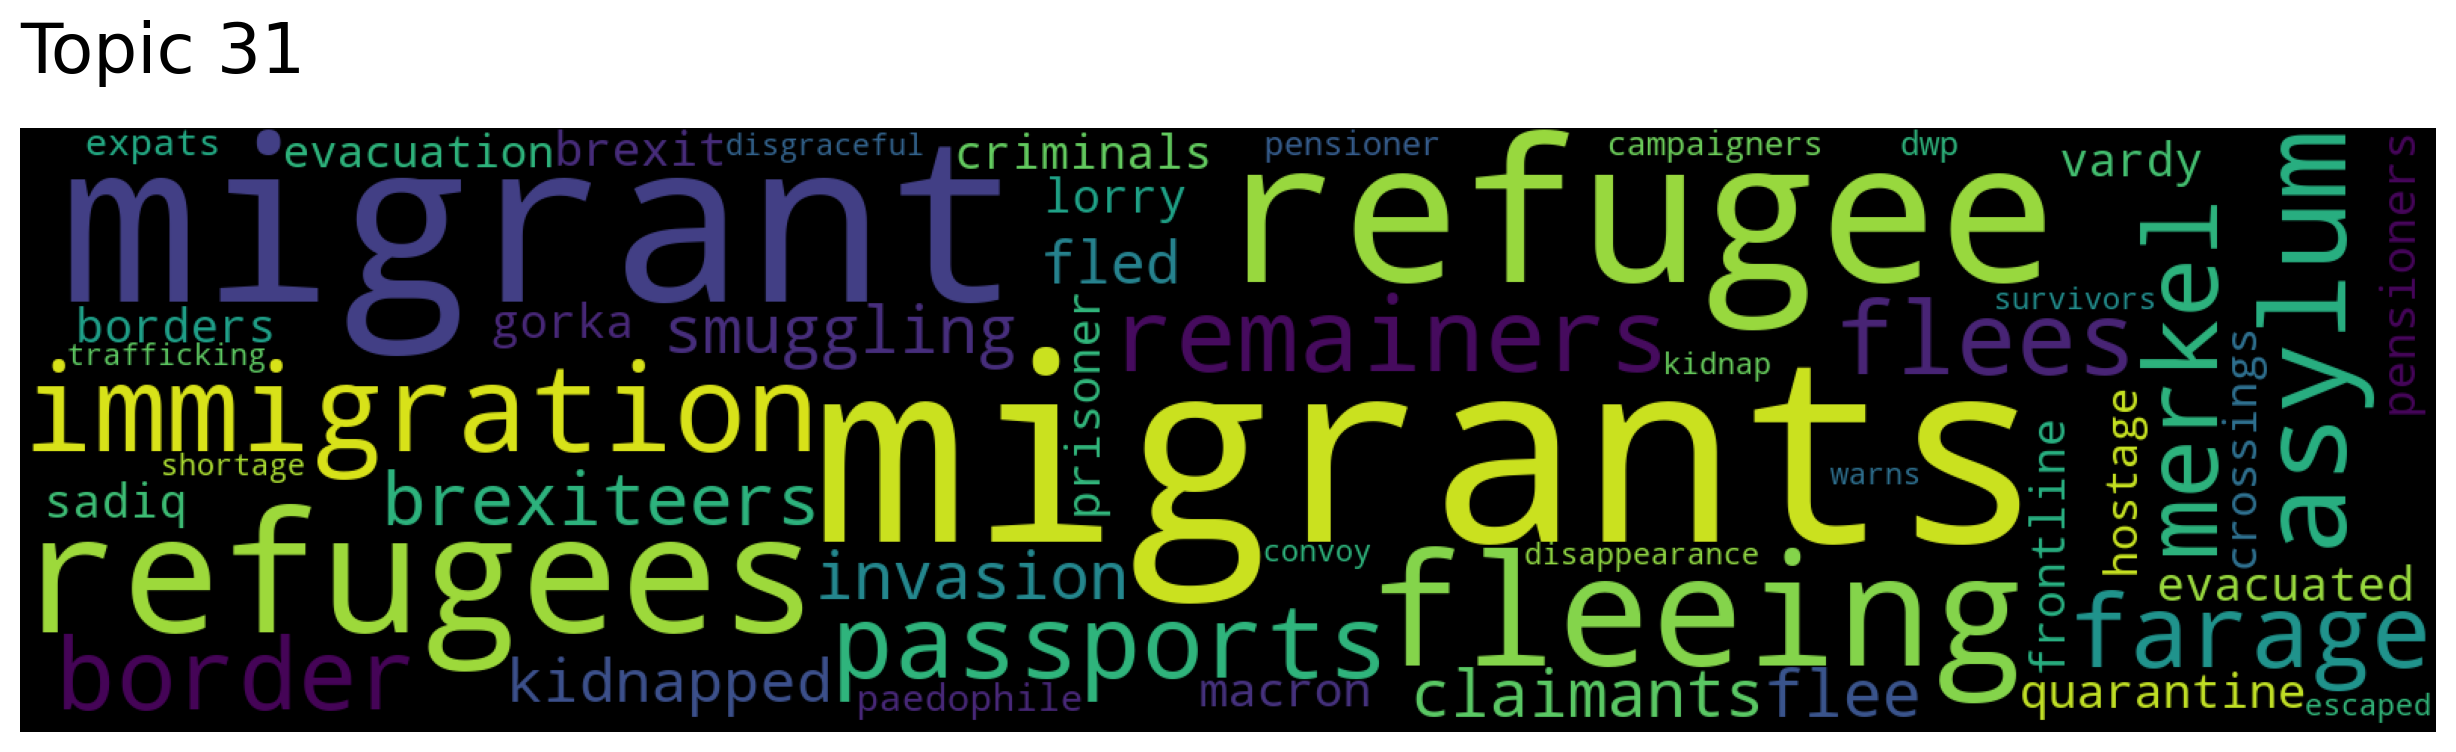

In [ ]:
model_5.generate_topic_wordcloud(topic_num=31)

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["refugee"], num_topics=5)
topic_nums

array([ 652,  215,   31,  707, 1115])

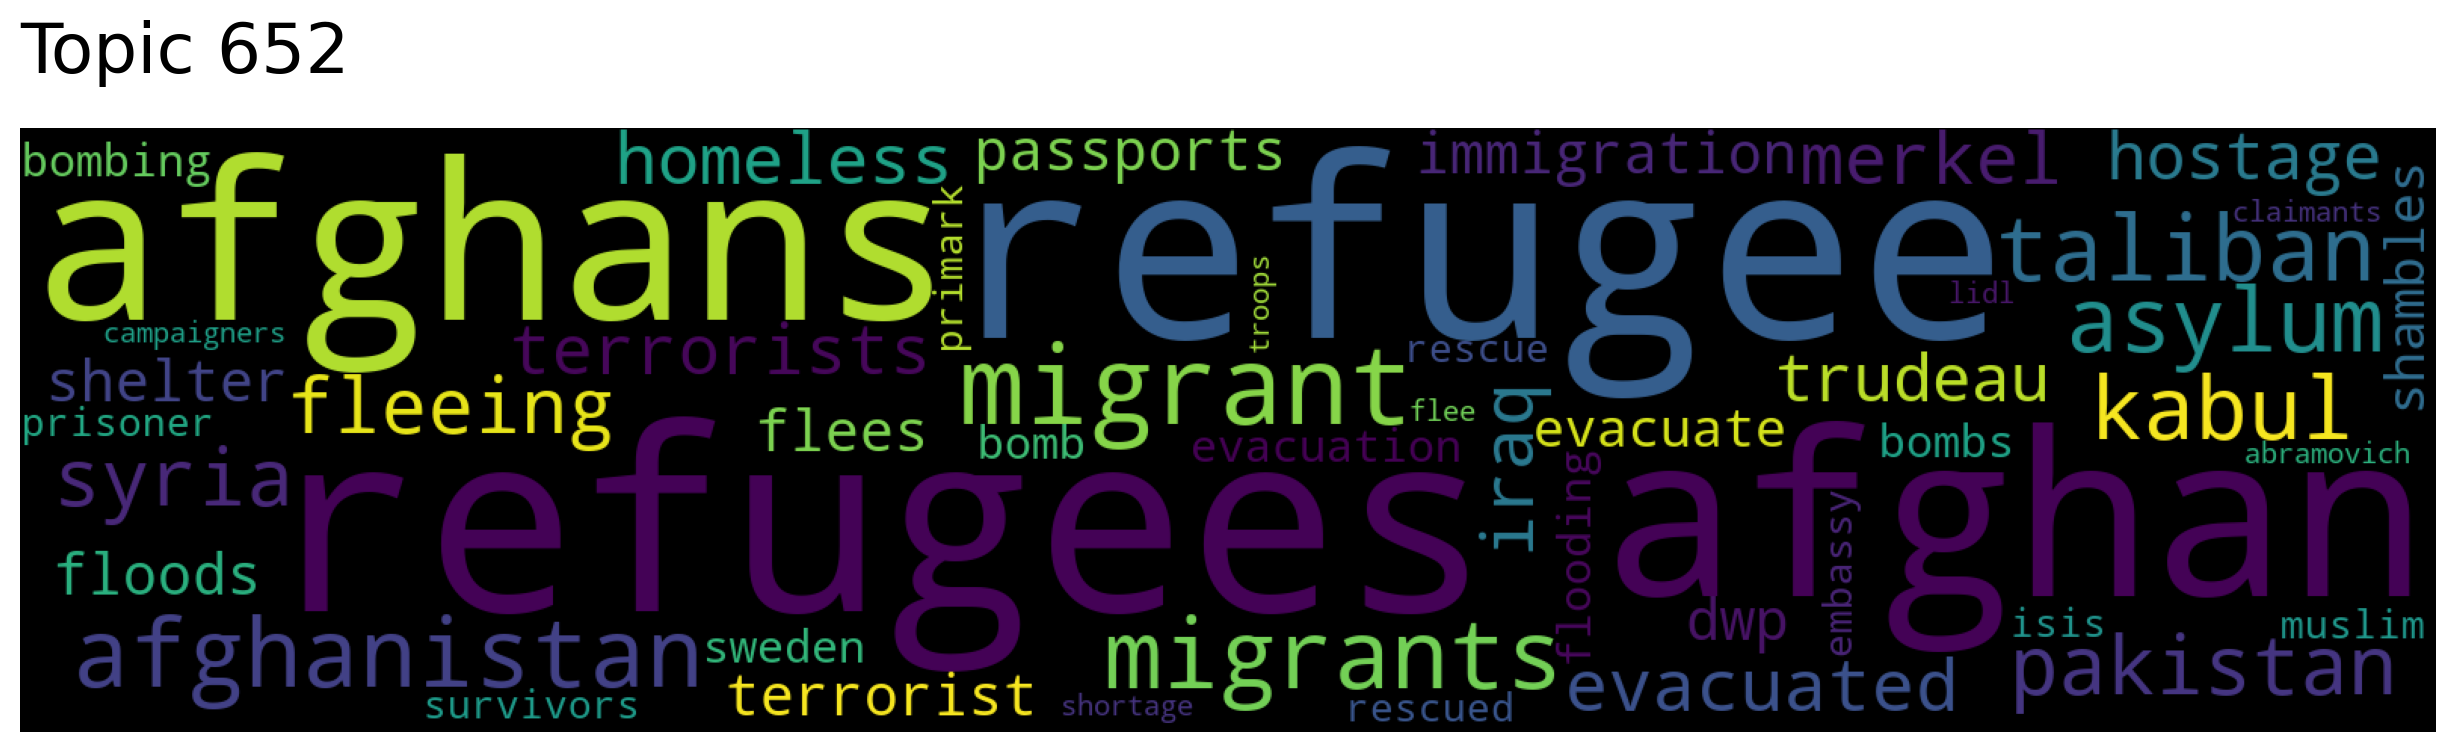

In [ ]:
model_5.generate_topic_wordcloud(topic_num=652)

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["asylum"], num_topics=5)
topic_nums

array([652,  31, 462, 707, 215])

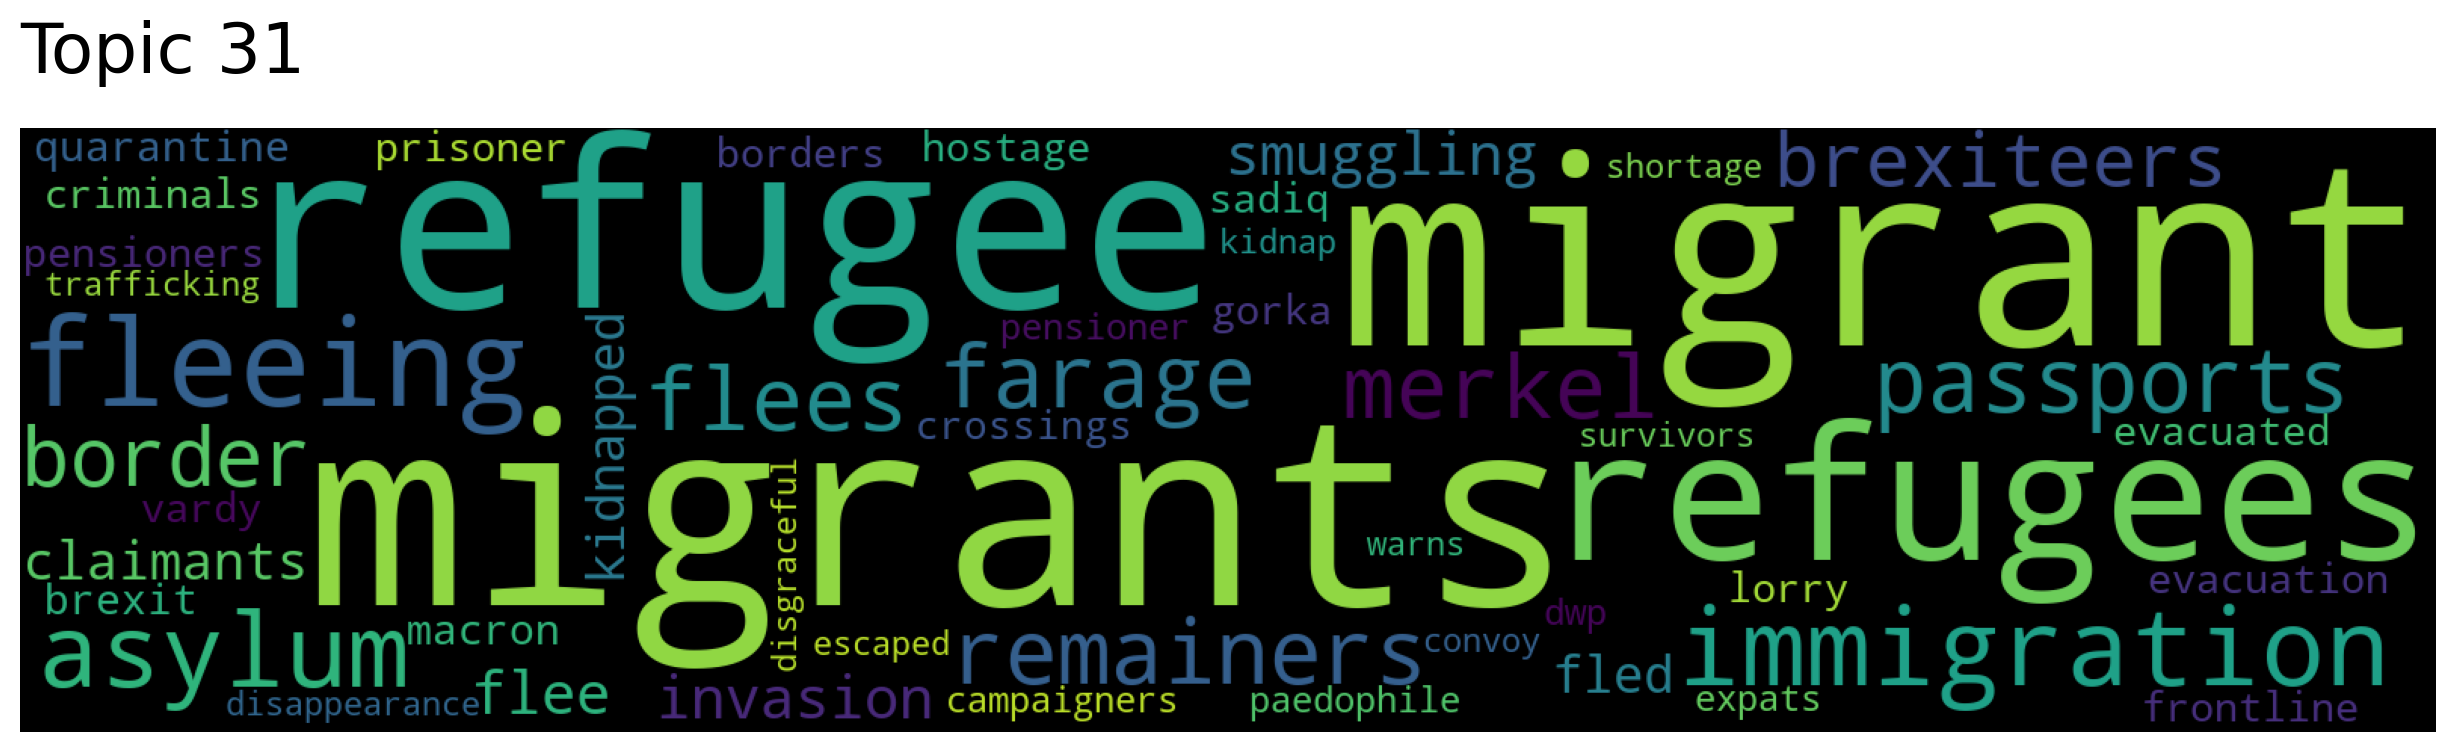

In [ ]:
model_5.generate_topic_wordcloud(topic_num=31)

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["ukraine"], num_topics=5)
topic_nums

array([  2,  75, 168, 684, 683])

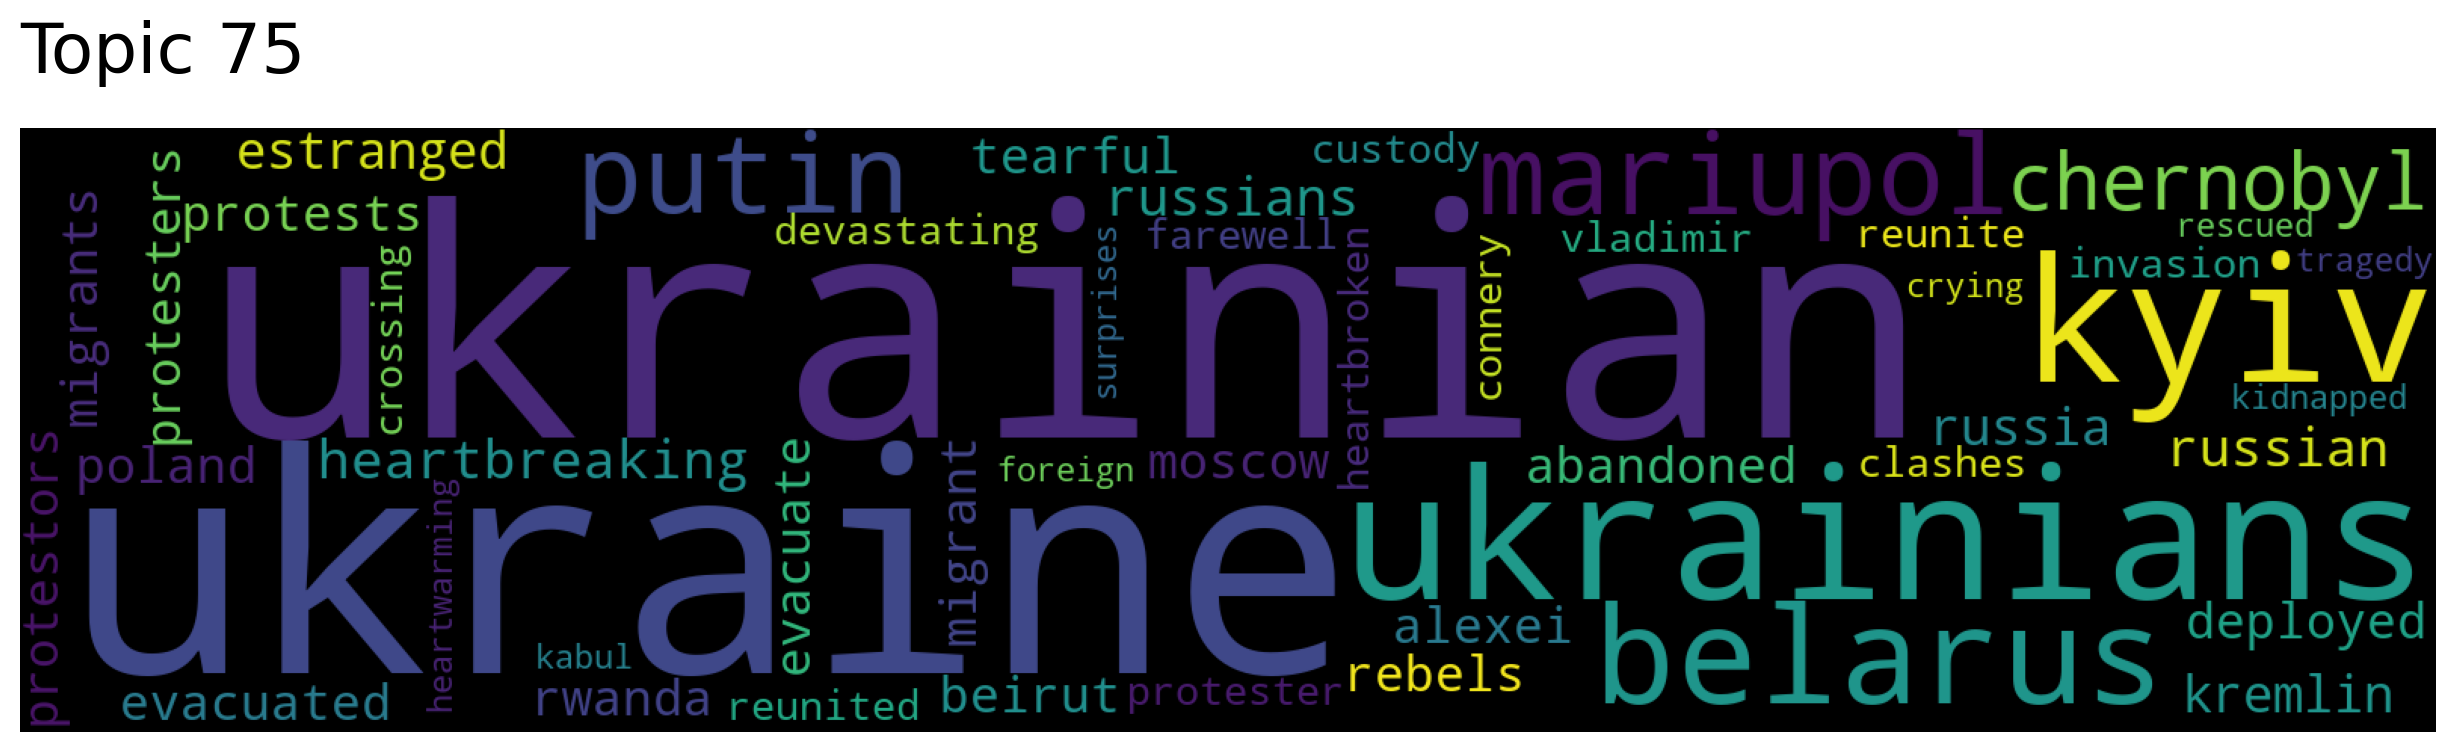

In [ ]:
model_5.generate_topic_wordcloud(topic_num=75)

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["ukraine"], num_topics=5)
topic_nums